## Example of MS-SSIM

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from Metric import *
import torchvision.datasets as dset

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
def imshow(img):
    img = img / 2 + 0.5
    npim = img.numpy() 
    plt.imshow(np.transpose(npim, (1, 2, 0)))
    plt.show()

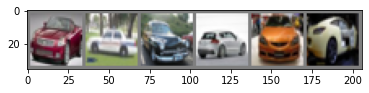

In [8]:
# extract label 1 samples
label_1_images = []
dataiter = iter(testloader)
while len(label_1_images)<6:
  images, labels = next(dataiter)
  for i in range(4):
    if labels[i]==1:
      label_1_images.append(images[i])
label_1_images = label_1_images[0:6]
imshow(torchvision.utils.make_grid(label_1_images))

In [9]:
print(get_ms_ssim(label_1_images[0].reshape(1,3,32,32),label_1_images[1].reshape(1,3,32,32)))
print(get_ms_ssim(label_1_images[2].reshape(1,3,32,32),label_1_images[3].reshape(1,3,32,32)))
print(get_ms_ssim(label_1_images[4].reshape(1,3,32,32),label_1_images[5].reshape(1,3,32,32)))  

tensor(0.0264)
tensor(0.0361)
tensor(0.0582)


## Example of Inception Score

In [6]:
mean_inception = [0.485, 0.456, 0.406]
std_inception = [0.229, 0.224, 0.225]
cifar = dset.CIFAR10(root='data/', download=True,
                     transform=transforms.Compose([transforms.Resize(32),
                                                   transforms.ToTensor(),
                                                   transforms.Normalize(mean_inception, std_inception)
                                                   ]))

Files already downloaded and verified


In [7]:
IS, std = get_inception_score(cifar)
print('IS is %.4f' % IS)
print('std is %.4f' % std)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

IS is 10.4542
std is 0.1429
